In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset_train = pd.read_csv('carga_gw_2020.csv', sep = ';', engine = "python", header = None)



In [ ]:
dataset_train.head()

,0,1
0,01/01/2018,"1.264,5"
1,02/01/2018,"1.519,40"
2,03/01/2018,"1.591,30"
3,04/01/2018,"1.588,70"
4,05/01/2018,"1.594,70"


In [ ]:
def to_numeric(x): 
    
    x = x.replace(',','.')
    sep = x.split('.')
    
    if len(sep) == 2:
        x = sep[0]+'.'+sep[1]
        
        
    elif len(sep) ==3 :
        x = sep[0]+sep[1]+'.'+sep[2]
    
    else:
        x = 0
    
    x_num = pd.to_numeric(x)

    return  x_num


In [ ]:
def preprocess_df(df):
        
    # Determina novos nome de colunas
    df.columns = ["Date", "Carga"]
    
    df.Date = pd.to_datetime(df.Date, dayfirst= True)
    df.dtypes
    
    # Transforma colunas em numericos 
    df['Carga'] = pd.to_numeric(df['Carga'].apply(to_numeric))
    
    
    
    # Associa coluna Date ao index
    #df.index = pd.to_datetime(df.Date, format="%m-%d-%Y")
    # dropa coluna Date extra 
    #df.drop("Date", axis=1, inplace=True)
    
    return df

In [ ]:
def fill_na_with_mean(df):
    
    num_cols = len(list(df.columns.values))
    
    for col in range(num_cols):
        
        df.iloc[:,col] = df.iloc[:,col].fillna(df.iloc[:,col].mean())
        
    return df

In [ ]:
dataset_train = preprocess_df(dataset_train)
dataset_train = fill_na_with_mean(dataset_train)
    
dataset_train.head()

,Date,Carga
0,2018-01-01,1264.5
1,2018-01-02,1519.4
2,2018-01-03,1591.3
3,2018-01-04,1588.7
4,2018-01-05,1594.7


In [ ]:
training = dataset_train.iloc[: , 1:2]

In [ ]:
train = training[0:729]
train.shape

(729, 1)

##Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

##Criando uma estrututra de dados que receba 60 passos no tempo e retorne uma saída

In [ ]:
x_train = []
y_train = []
for i in range(60,729): 
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train) 

#Reshaping 

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Inicializando a RNN
regressor = Sequential()

##Adicionando a primeira layer de LSTM e uma camada de dropout

In [ ]:
regressor.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

## Adicionando a segunda camada 

In [ ]:
regressor.add(LSTM(units=50, return_sequences = True,))
regressor.add(Dropout(0.2))

## Adicionado a terceira camada 

In [ ]:
regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adicionando a quarta camada 

In [ ]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

## Adicionando a camada de saída 

In [ ]:
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
21/21 [==============================] - 2s 117ms/step - loss: 0.0614
Epoch 2/100
21/21 [==============================] - 2s 103ms/step - loss: 0.0320
Epoch 3/100
21/21 [==============================] - 2s 107ms/step - loss: 0.0311
Epoch 4/100
21/21 [==============================] - 2s 101ms/step - loss: 0.0316
Epoch 5/100
21/21 [==============================] - 2s 102ms/step - loss: 0.0305
Epoch 6/100
21/21 [==============================] - 2s 110ms/step - loss: 0.0289
Epoch 7/100
21/21 [==============================] - 2s 105ms/step - loss: 0.0294
Epoch 8/100
21/21 [==============================] - 2s 107ms/step - loss: 0.0296
Epoch 9/100
21/21 [==============================] - 2s 107ms/step - loss: 0.0298
Epoch 10/100
21/21 [==============================] - 2s 114ms/step - loss: 0.0303
Epoch 11/100
21/21 [==============================] - 2s 102ms/step - loss: 0.0289
Epoch 12/100
21/21 [==============================] - 2s 103ms/step - loss: 0.0291
Epoch 13/100


In [ ]:
test = training[729:912]

In [ ]:
total = np.concatenate((train, test), axis = 0)

In [ ]:
input = total[669:912]

In [ ]:
input.reshape(-1,1)

array([[1664.5],
       [1442.9],
       [1394.2],
       [1695.7],
       [1730.5],
       [1673.6],
       [1652.8],
       [1655.1],
       [1525.3],
       [1390.1],
       [1635.5],
       [1649. ],
       [1656.9],
       [1637.9],
       [1433.2],
       [1396.8],
       [1310.1],
       [1563.6],
       [1619.7],
       [1590.8],
       [1655.7],
       [1674.7],
       [1538.2],
       [1335.5],
       [1567.8],
       [1628.1],
       [1643.9],
       [1624.3],
       [1605.4],
       [1510.7],
       [1386.3],
       [1602.7],
       [1614.9],
       [1644.8],
       [1669.5],
       [1642.5],
       [1505.5],
       [1367.8],
       [1627.2],
       [1664.2],
       [1674.8],
       [1684.8],
       [1675.7],
       [1537. ],
       [1420.6],
       [1677.7],
       [1701.6],
       [1665.8],
       [1642.6],
       [1638.5],
       [1534.8],
       [1420.3],
       [1520.6],
       [1434.4],
       [1301.7],
       [1561.5],
       [1616.9],
       [1559.2],
       [1466.7

In [ ]:
input.shape

(243, 1)

In [ ]:
input = sc.transform(input)
x_test = []

In [ ]:
for i in range(60,80):
    x_test.append(input[i-60:i, 0])
    
x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
predicted_load = regressor.predict(x_test) 
predicted_load = sc.inverse_transform(predicted_load) 

In [ ]:
x_test.shape

(20, 60, 1)

In [ ]:
predicted_load.shape

(20, 1)

In [ ]:
carga = training[892:].values


In [ ]:
carga

array([[1360. ],
       [1394. ],
       [1318.2],
       [1203. ],
       [1375.4],
       [1405.4],
       [1407. ],
       [1405.6],
       [1417.1],
       [1334.7],
       [1223.3],
       [1425.7],
       [1442.2],
       [1438.8],
       [1461.5],
       [1456.8],
       [1353.1],
       [1224.4],
       [1413.4],
       [1413.9]])

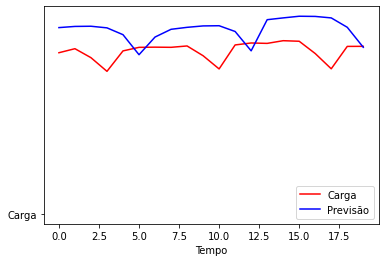

In [ ]:

plt.plot(carga, color = 'red', label = 'Carga')
plt.plot(predicted_load, color = 'blue', label = 'Previsão')
plt.xlabel('Tempo')
plt.plot('Carga')
plt.legend()
plt.show()